# Train a 5 hidden layer CNN to classify CIFAR-10
### -- Note that the CNN architecture is taken from an example on the Keras Team's github repository

In [1]:
%matplotlib inline

'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


D:\Everything\Programs\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Setup the training and test data set for the cases
Standard CIFAR-10 test and training sets with pixel channel values converted to float32 values and scaled to the interval [0,1]



x_train shape: (50000, 32, 32, 3)
Training sample size:  50000
Testing sample size:  10000


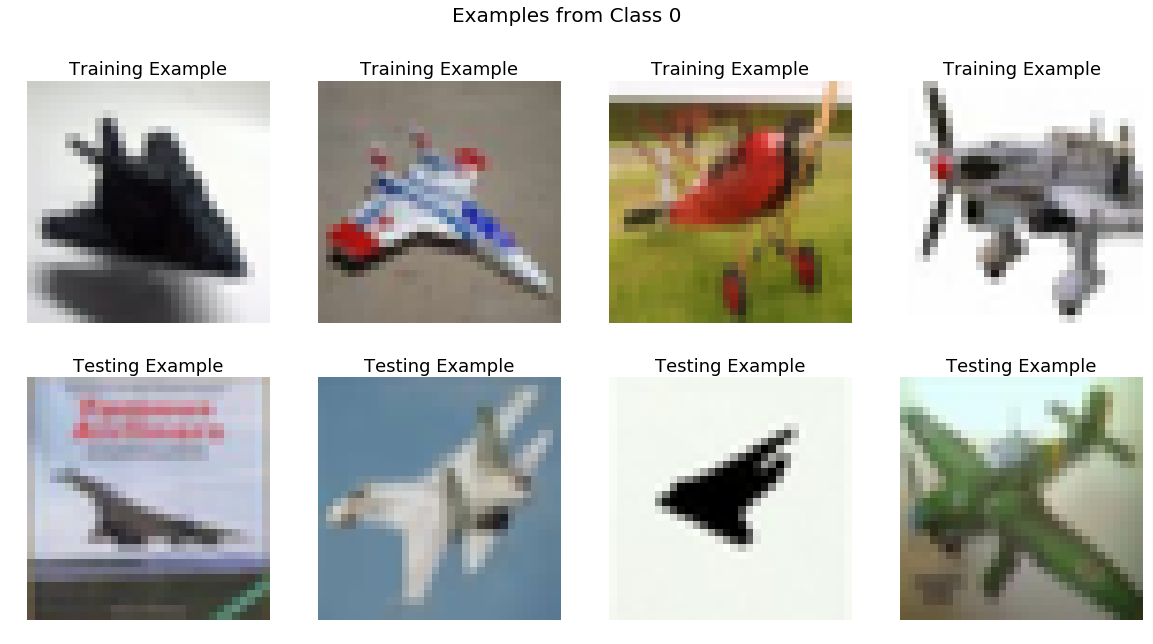

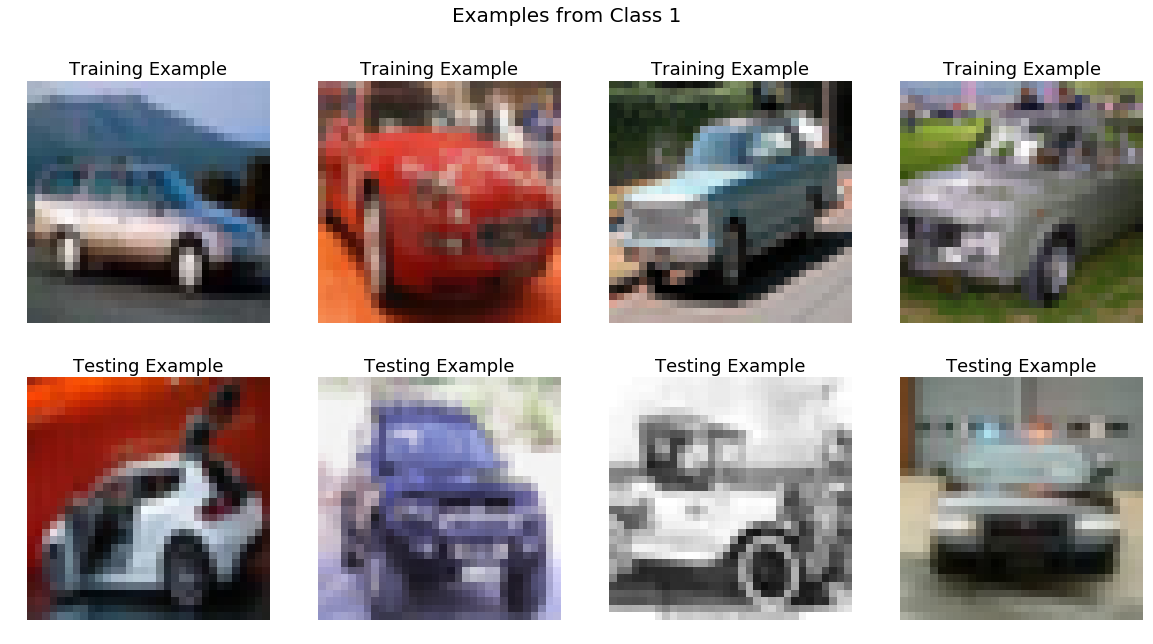

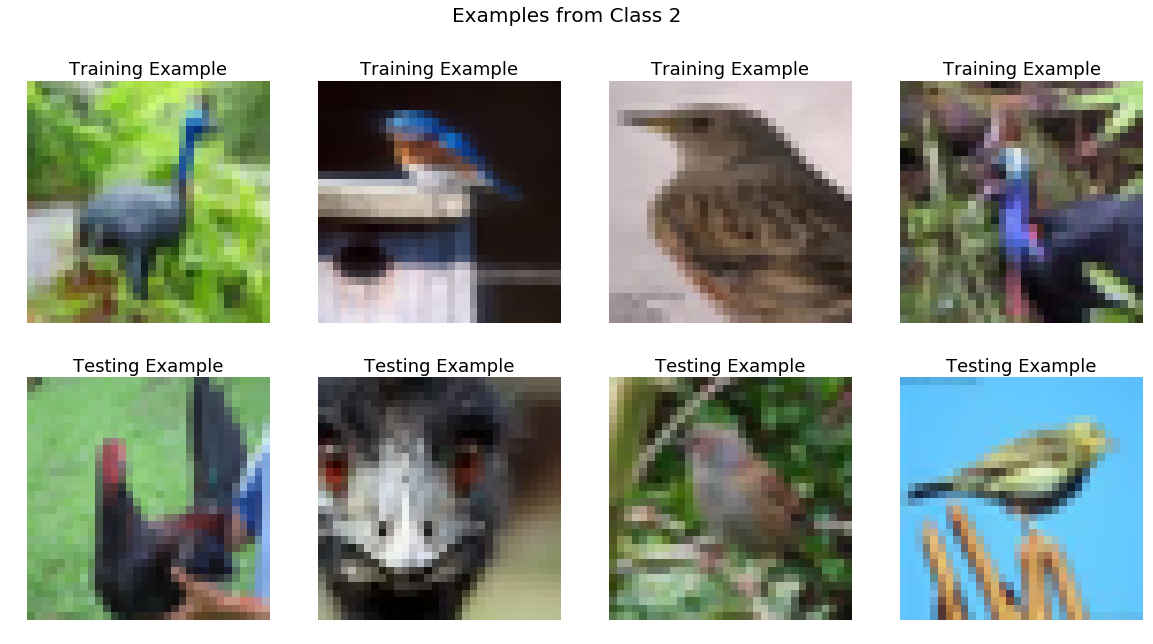

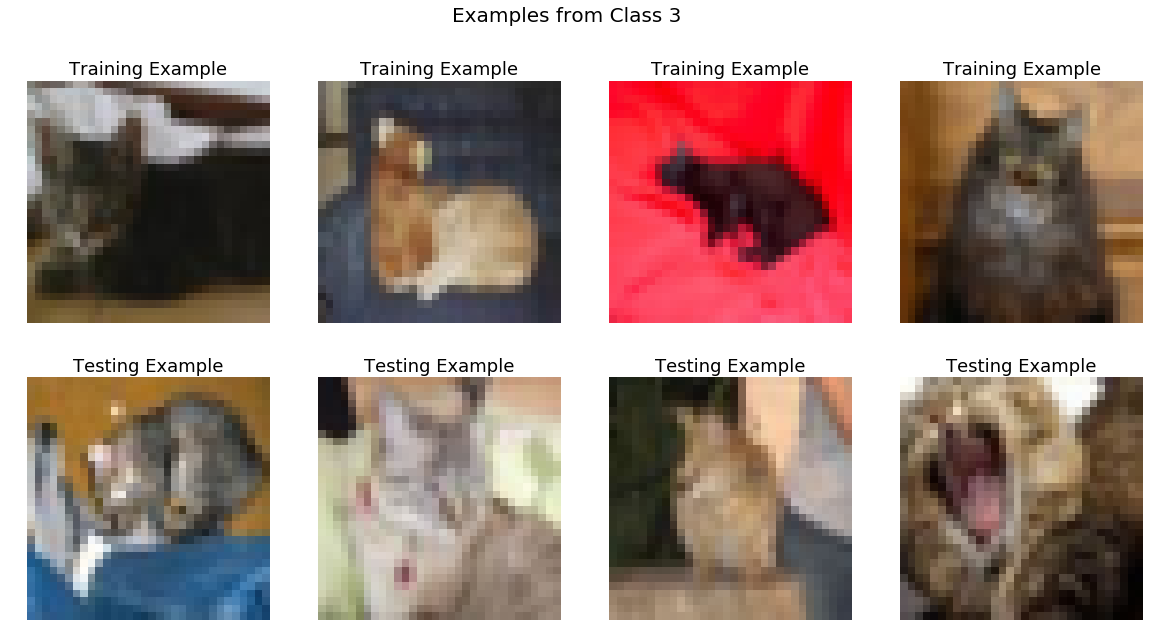

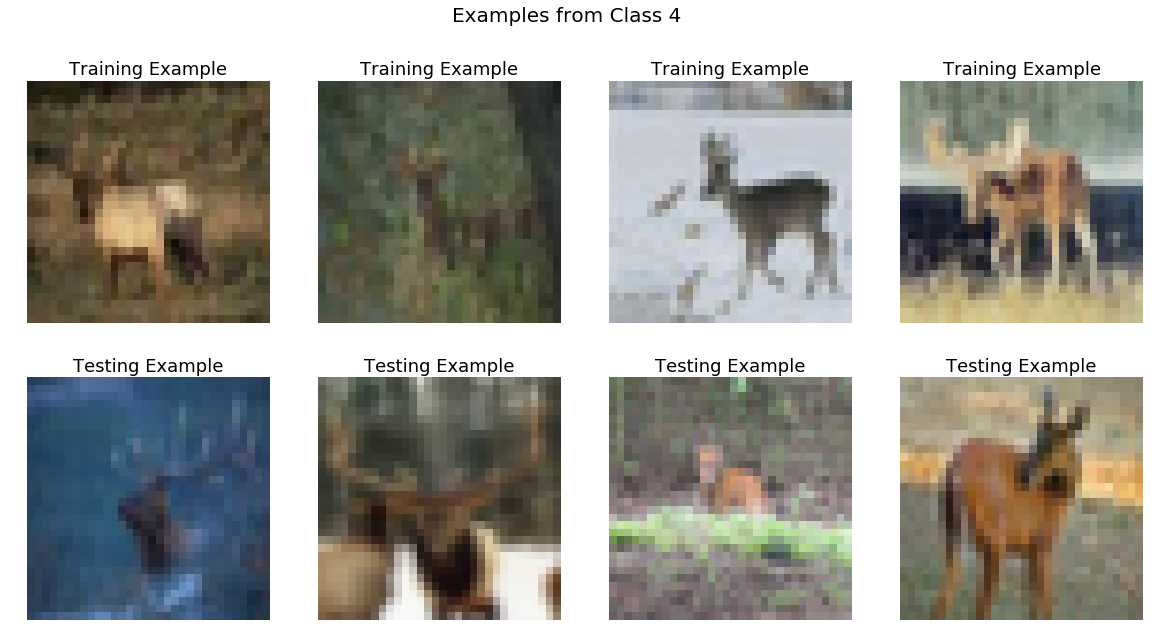

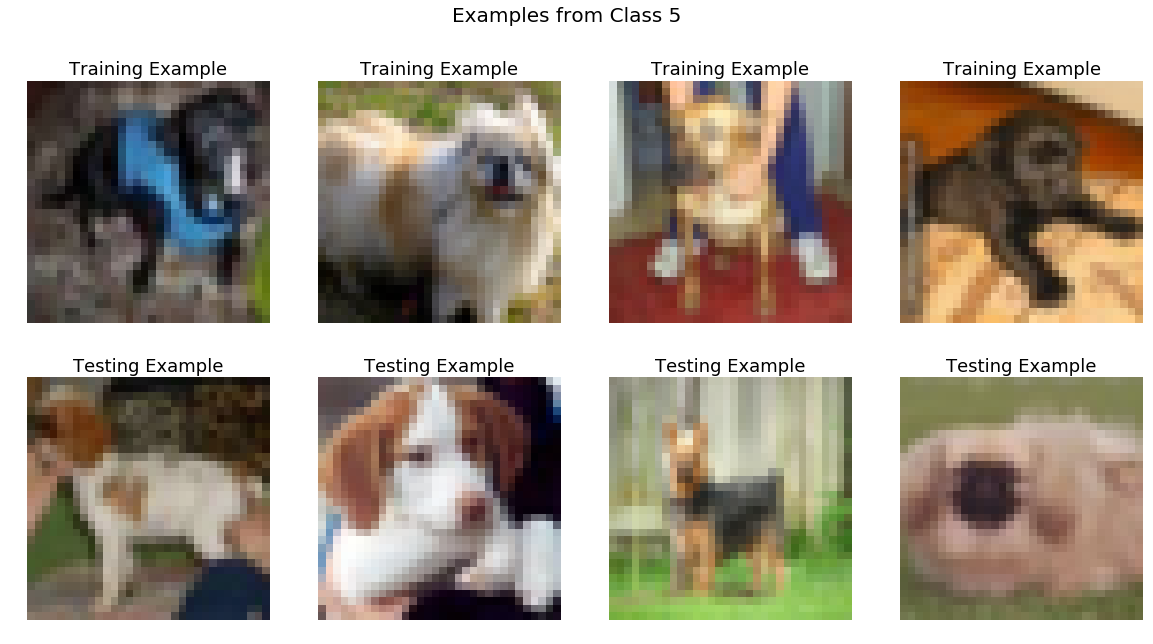

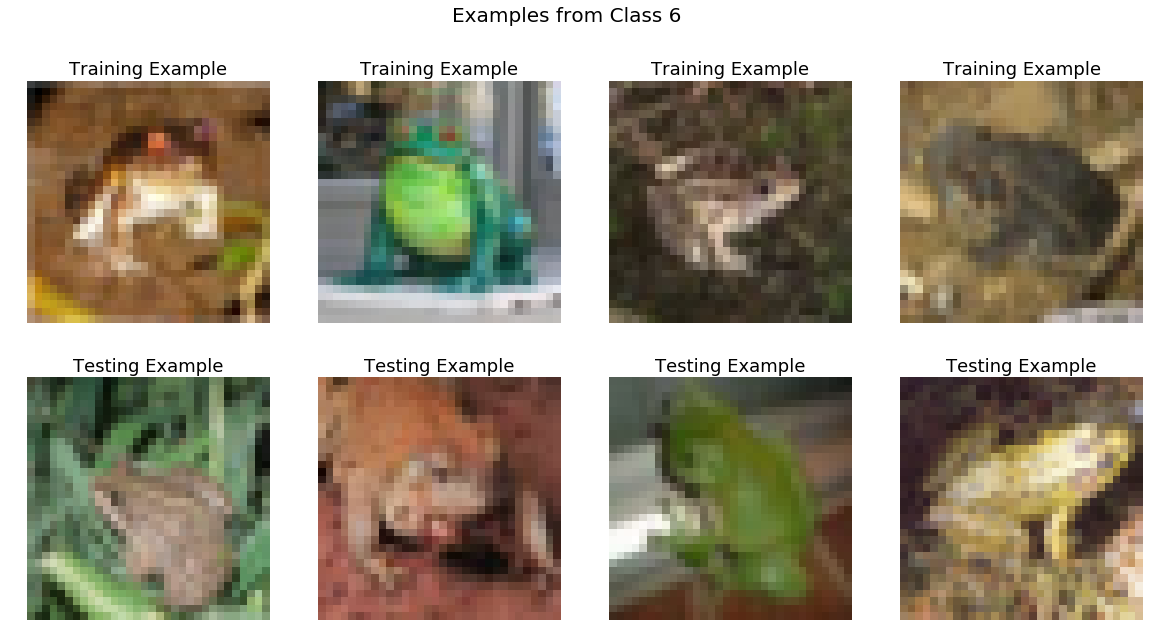

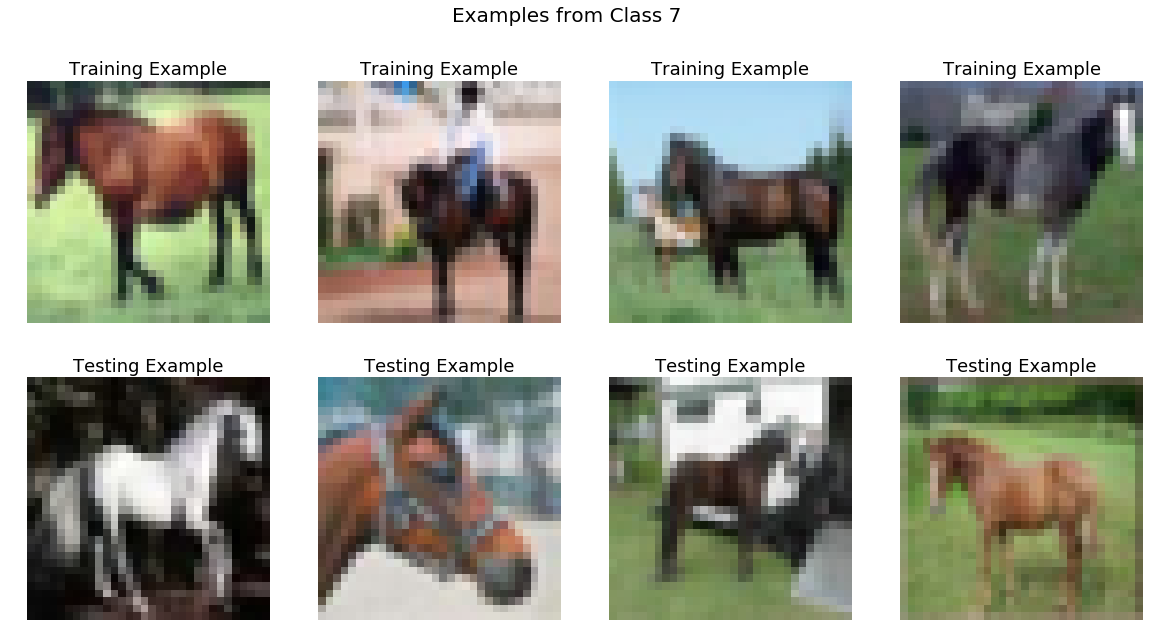

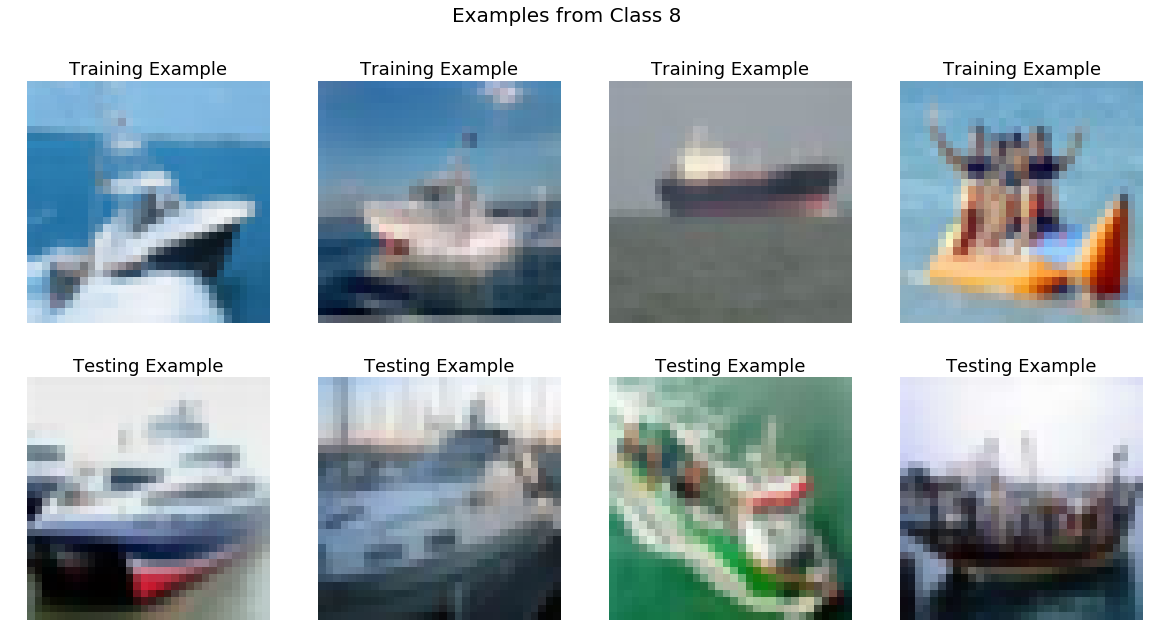

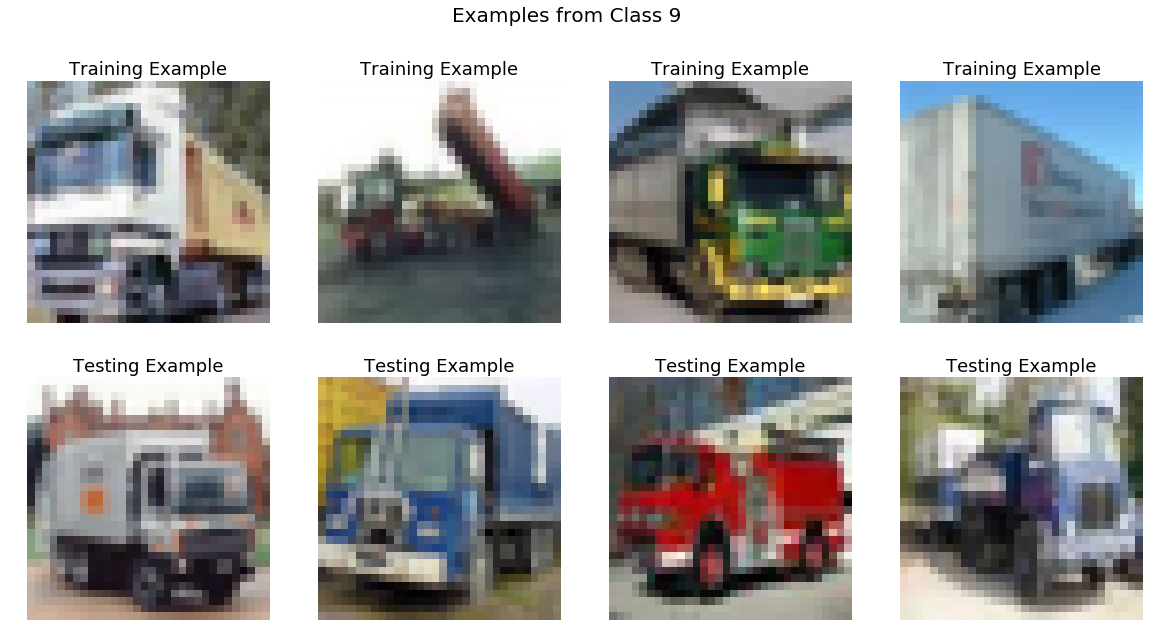

In [2]:
# Setup the training and test data sets.

num_classes = 10

# The data, shuffled and split between train and test sets:
(x_train, y_trainLabels), (x_test, y_testLabels) = cifar10.load_data()

# Convert class labels to binary (1-hot) 10-tuples.
y_train = keras.utils.to_categorical(y_trainLabels,  num_classes)
y_test  = keras.utils.to_categorical(y_testLabels,   num_classes)
y_trainLabels=y_trainLabels.flatten(); y_testLabels=y_testLabels.flatten();

print('x_train shape:', x_train.shape)
print('Training sample size: ', x_train.shape[0])
print('Testing sample size: ',  x_test.shape[0])
numOfRows = x_train.shape[1]; numOfCols = x_train.shape[2];
numOfCh = x_train.shape[3];

# Show a few example images from each class
for ii in range(num_classes):
    plt.figure(figsize=[20,10]); 
    plt.suptitle('Examples from Class '+str(ii), fontsize=20)
    indexTrainArray = np.where(y_trainLabels == ii)[0]
    indexTestArray  = np.where(y_testLabels == ii)[0]
    for jj in range(4):
        plt.subplot(2,4,jj+1); 
        anImage = x_train[indexTrainArray[jj],:,:,:]
        plt.imshow(anImage); plt.axis('off')
        plt.title('Training Example', fontsize=18)
        anImage = x_test[indexTestArray[jj],:,:,:]
        plt.subplot(2,4,jj+5); plt.imshow(anImage); plt.axis('off')
        plt.title('Testing Example', fontsize=18)
    plt.show()


# Scale the pixel values in the images
x_train = x_train.astype('float32'); x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255



In [3]:
# Set the number of epochs to train and the minibatch size
batch_size = 32
epochs = 5

## Train a network for the CIFAR10 data set

In [4]:
# Create a model object for a simple CNN without regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

cifarHistoryObj = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 583s 12ms/step - loss: 1.8157 - acc: 0.3332 - val_loss: 1.5614 - val_acc: 0.4297
Epoch 2/5
50000/50000 [==============================] - 511s 10ms/step - loss: 1.5151 - acc: 0.4469 - val_loss: 1.4387 - val_acc: 0.4908
Epoch 3/5
50000/50000 [==============================] - 480s 10ms/step - loss: 1.3803 - acc: 0.5043 - val_loss: 1.2408 - val_acc: 0.5554
Epoch 4/5
50000/50000 [==============================] - 312s 6ms/step - loss: 1.2857 - acc: 0.5396 - val_loss: 1.1662 - val_acc: 0.5862
Epoch 5/5
50000/50000 [==============================] - 596s 12ms/step - loss: 1.2078 - acc: 0.5722 - val_loss: 1.1156 - val_acc: 0.6035


In [5]:
# Run network to generate predictions on a few images from the test set
numInPredSubset=15
predictionArray = model.predict(x_test[0:numInPredSubset, :,:,:])

# Find the output class with the peak value
predictedClassArray = np.argmax(predictionArray, axis=1).flatten()

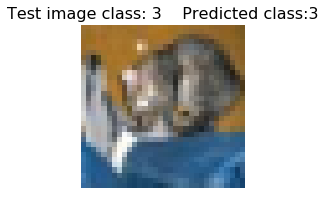

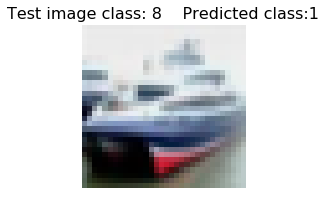

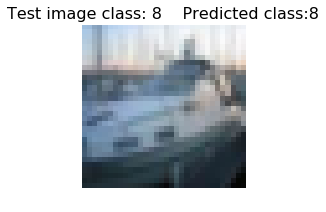

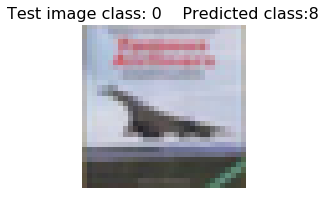

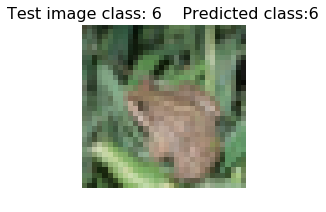

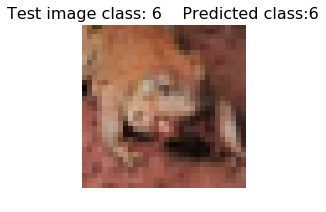

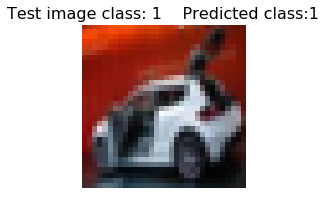

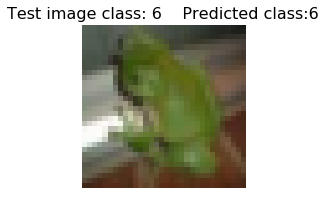

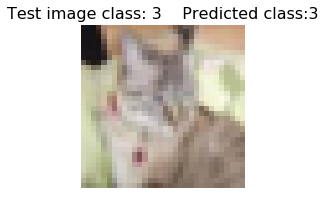

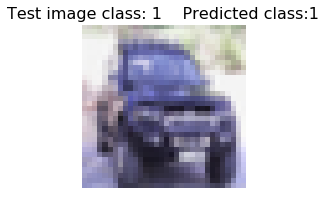

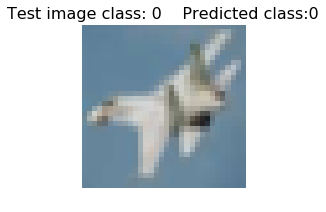

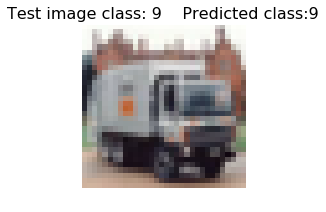

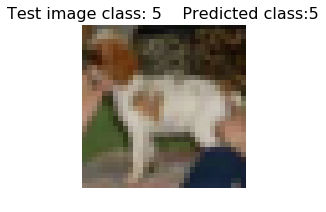

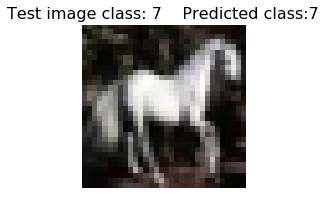

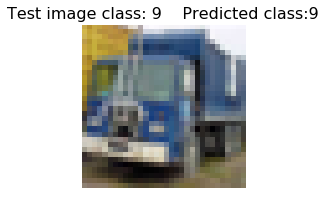

In [6]:
# Show images, their true class, and the predition
for ii in range(numInPredSubset):
    plt.figure(figsize=[3,3]) 
    anImage = x_test[ii,:,:,:]; 
    plt.imshow(anImage); plt.axis('off')
    plt.title('Test image class: ' + str(y_testLabels[ii]) + '    Predicted class:' + \
              str(predictedClassArray[ii]), fontsize=16)


In [7]:
# Score trained model against the training and test sets (i.e. generate predictions and calculate the accuracy)
trainScores = model.evaluate(x_train, y_train, verbose=1)
print('Training loss:', trainScores[0]); print('Training set accuracy:', trainScores[1])

testScores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', testScores[0]); print('Testing set accuracy:', testScores[1])



50000/50000 [==============================] - 177s 4ms/step
Training loss: 1.0896574648666382
Training set accuracy: 0.61688
10000/10000 [==============================] - 36s 4ms/step
Test loss: 1.1155661170959472
Testing set accuracy: 0.6035
